In [1]:
import anndata as ad

In [2]:
adata = ad.read_h5ad('pancreas_scib.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors', 'batch'
    layers: 'counts'

In [4]:
main_data_matrix = adata.X

In [5]:
main_data_matrix

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.6120808 , 0.        , 0.        , ..., 0.        , 2.6120806 ,
        0.        ],
       [0.        , 3.311074  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.42996258, 2.6206095 , 0.        , ..., 2.1124895 , 1.0953737 ,
        1.0403827 ],
       [3.4695568 , 0.64595073, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.4566651 , 0.5159923 , 0.        , ..., 0.        , 0.53929645,
        0.        ]], dtype=float32)

In [12]:
cell_metadata = adata.obs
cell_metadata['celltype'].value_counts()

celltype
alpha                 5493
beta                  4169
ductal                2142
acinar                1669
delta                 1055
gamma                  699
activated_stellate     464
endothelial            313
quiescent_stellate     193
macrophage              79
mast                    42
epsilon                 32
schwann                 25
t_cell                   7
Name: count, dtype: int64

In [15]:
tech_column = adata.obs['tech']
tech_column.value_counts()

tech
inDrop3       3605
smartseq2     2394
celseq2       2285
inDrop1       1937
inDrop2       1724
smarter       1492
inDrop4       1303
celseq        1004
fluidigmc1     638
Name: count, dtype: int64

In [18]:
size_factors = adata.obs['size_factors']
size_factors.value_counts()

size_factors
1.000000    1492
0.013286       1
0.015746       1
0.012939       1
0.013945       1
            ... 
0.070177       1
0.076013       1
0.043914       1
0.090963       1
0.020973       1
Name: count, Length: 14891, dtype: int64

In [19]:
batch_column = adata.obs['batch']
batch_column.value_counts()

batch
indrop        8569
smartseq2     2394
celseq2       2285
smarter       1492
celseq        1004
fluidigmc1     638
Name: count, dtype: int64

In [20]:
raw_counts = adata.layers['counts']
print(raw_counts)

[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 1.0019583  0.         0.        ...  0.         1.001958   0.       ]
 [ 0.         1.0019583  0.        ...  0.         0.         0.       ]
 ...
 [ 0.5372    12.7441     0.        ...  7.2688     1.9903     1.8303   ]
 [31.1225     0.9078     0.        ...  0.         0.         0.       ]
 [ 0.5788     0.6753     0.        ...  0.         0.7148     0.       ]]


In [23]:
gene_metadata = adata.var
gene_metadata.value_counts

<bound method DataFrame.value_counts of Empty DataFrame
Columns: []
Index: [A1BG, A1CF, A2M, A2ML1, A4GALT, A4GNT, AA06, AAAS, AACS, AACSP1, AADAC, AADACL2, AADACL3, AADAT, AAED1, AAGAB, AAK1, AAMDC, AAMP, AANAT, AAR2, AARD, AARS, AARS2, AARSD1, AASDH, AASDHPPT, AASS, AATF, AATK, ABAT, ABCA1, ABCA10, ABCA11P, ABCA12, ABCA13, ABCA17P, ABCA2, ABCA3, ABCA4, ABCA5, ABCA6, ABCA7, ABCA8, ABCA9, ABCB1, ABCB10, ABCB11, ABCB4, ABCB5, ABCB6, ABCB7, ABCB8, ABCB9, ABCC1, ABCC10, ABCC11, ABCC12, ABCC13, ABCC2, ABCC3, ABCC4, ABCC5, ABCC6, ABCC6P1, ABCC6P2, ABCC8, ABCC9, ABCD1, ABCD2, ABCD3, ABCD4, ABCE1, ABCF1, ABCF2, ABCF3, ABCG1, ABCG2, ABCG4, ABCG5, ABCG8, ABHD1, ABHD10, ABHD11, ABHD12, ABHD12B, ABHD13, ABHD14A, ABHD14B, ABHD15, ABHD16A, ABHD16B, ABHD17A, ABHD17B, ABHD17C, ABHD2, ABHD3, ABHD4, ABHD5, ABHD6, ...]

[19093 rows x 0 columns]>

/Users/pragnyapathak/anaconda3/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:641: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


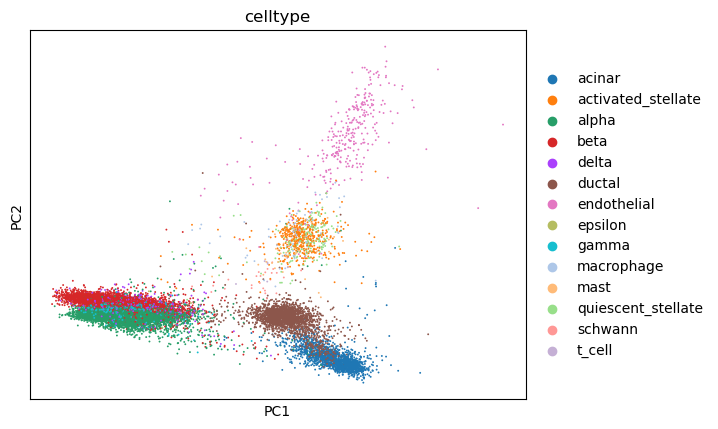

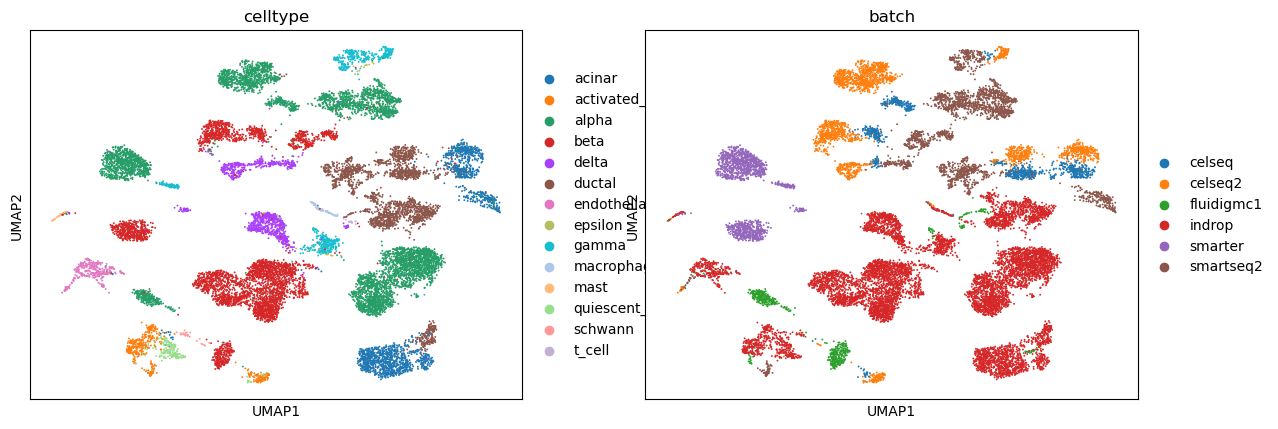

In [27]:
import scanpy as sc

# Basic preprocessing and visualization example
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]

# Check if 'size_factors' exists in obs
if 'size_factors' in adata.obs.columns:
    sc.pp.regress_out(adata, ['size_factors'])
else:
    print("Column 'size_factors' not found in observation metadata.")

sc.pp.scale(adata, max_value=10)

# PCA and clustering
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='celltype')

# UMAP for visualization
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['celltype', 'batch'])


In [26]:
adata.obs.columns

Index(['tech', 'celltype', 'size_factors', 'batch', 'n_genes'], dtype='object')

In [28]:
rna_seq_data = adata.X
rna_seq_data

array([[-0.24147248,  1.41007777, -0.53316849, ..., -0.29756413,
        -0.47731373, -0.57588811],
       [-0.240991  ,  0.77283433, -0.53106356, ..., -0.29706848,
        -0.475739  , -0.57805315],
       [-0.24138311,  1.16473498, -0.53277777, ..., -0.29747212,
        -0.47702143, -0.57628999],
       ...,
       [-0.23227475,  0.82569611, -0.49295769, ..., -0.28809568,
        -0.44723143, -0.61724723],
       [-0.23227475,  0.77229356, -0.49295769, ...,  3.65884266,
        -0.44723143, -0.61724723],
       [-0.23227475,  1.08573636, -0.49295769, ..., -0.28809568,
        -0.44723143, -0.61724723]])